## Import Necessary liberaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Upload Dataset Review.csv

## Mount Google Drive to access files from '/content/drive' in Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzipping content from zip folder Reviews.csv.zip

In [ ]:
!unzip /content/drive/MyDrive/Reviews.csv.zip -d /content/

Archive:  /content/drive/MyDrive/Reviews.csv.zip
  inflating: /content/Reviews.csv    


## Why we used this upload method => Access Large Files Faster and Easily than (from google.colab import files)

## Initial data inspection

In [ ]:
df = pd.read_csv('Reviews.csv') # load csv

In [ ]:
df.info() # Check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.head() # Look at the first few rows of dataset

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Data Exploration, cleaning and visualization

In [ ]:
df = df.sample(n=15000, random_state=42) # let sample 15000 rows from dataset for quicker execution

In [ ]:
df.shape # look out for shape of dataset, we look it to verify weather we got first 15000 sample rows

(15000, 10)

In [ ]:
df.head() # will look weather we have got random rows from dataset or not...

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


Drop unecessary columns

In [ ]:
df = df.drop(['Id', 'ProductId', 'UserId', 'ProfileName'], axis=1) # no use of these ids and user ids
df.head() # look out dataset again

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


In [ ]:
df.shape # look for its shape is correct or not

(15000, 6)

In [ ]:
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / (df['HelpfulnessDenominator'] + 1e-9) # helps in understanding not just how many users found a review helpful,
 # but how impactful the review is in relation to the total audience it reached

In [ ]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
165256,0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,0.0
231465,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,0.0
427827,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,0.0
433954,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",0.0
70260,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,0.0


### Exploratory Data Visualization for Helpfulness Ration

In [ ]:
import seaborn as sns # seaborn for attractive graphs, for good evaluation

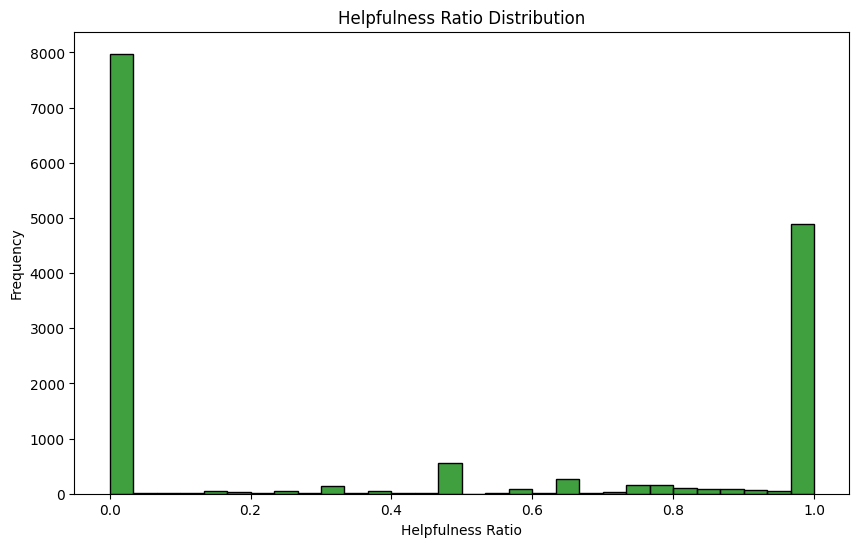

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['HelpfulnessRatio'], bins=30, color='green')
plt.title("Helpfulness Ratio Distribution")
plt.xlabel("Helpfulness Ratio")
plt.ylabel("Frequency")
plt.show()

### the distribution shows that most reviews are either entirely helpful or not helpful at all, few reviews receiving a mixed assessment of helpfulness. This reflect user tendencies to rate reviews more definitively as helpful or unhelpful, rather than moderately helpful

### Transform Score to Sentiment Labels

In [ ]:
# for rating 3 its neutral for less than 3 its negative for greater than 3 its positive review
def sentiment_label(score):
    if score > 3:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

In [ ]:
df['sentiment'] = df['Score'].apply(sentiment_label) # function to perform operation on column Score of dataframe df

In [ ]:
df.head() # and will look for sentiment column

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,sentiment
165256,0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,0.0,positive
231465,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,0.0,positive
427827,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,0.0,neutral
433954,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",0.0,negative
70260,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,0.0,positive


### Exploratory Data Visualization for sentiment class distribution

<ipython-input-74-eada305334e8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


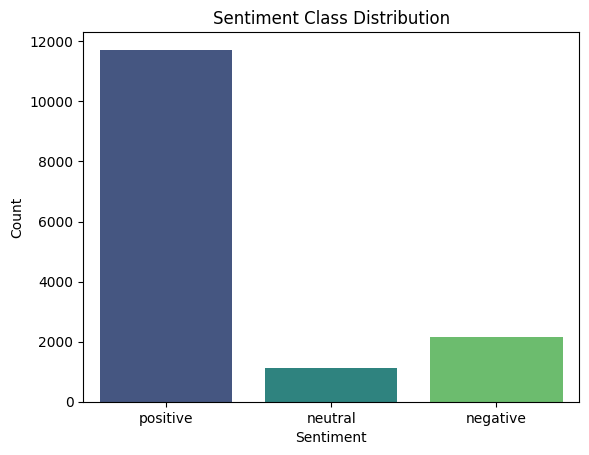

In [ ]:
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### the distribution shows that most reviews are positive, this shows customer satisfaction for product

In [ ]:
df['Text'][165256]

'Having tried a couple of other brands of gluten-free sandwich cookies, these are the best of the bunch.  They\'re crunchy and true to the texture of the other "real" cookies that aren\'t gluten-free.  Some might think that the filling makes them a bit too sweet, but for me that just means I\'ve satisfied my sweet tooth sooner!  The chocolate version from Glutino is just as good and has a true "chocolatey" taste - something that isn\'t there with the other gluten-free brands out there.'

## Handling missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 165256 to 420847
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HelpfulnessNumerator    15000 non-null  int64  
 1   HelpfulnessDenominator  15000 non-null  int64  
 2   Score                   15000 non-null  int64  
 3   Time                    15000 non-null  int64  
 4   Summary                 14999 non-null  object 
 5   Text                    15000 non-null  object 
 6   HelpfulnessRatio        15000 non-null  float64
 7   sentiment               15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


### we can see over there is one missing value in Summary column so as its a single value we can afford to loose it so we droped it by function dropna()

In [ ]:
df = df.dropna(subset=['Summary'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 165256 to 420847
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HelpfulnessNumerator    14999 non-null  int64  
 1   HelpfulnessDenominator  14999 non-null  int64  
 2   Score                   14999 non-null  int64  
 3   Time                    14999 non-null  int64  
 4   Summary                 14999 non-null  object 
 5   Text                    14999 non-null  object 
 6   HelpfulnessRatio        14999 non-null  float64
 7   sentiment               14999 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


###  So now we dont have any missing values

In [ ]:
df.shape

(14999, 8)

### Text Perprocessing

### merging summary and text in single column to make work easy

In [ ]:
df['reviewText'] = df['Summary'] + ' ' + df['Text']

<ipython-input-80-65ba816030f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['Summary'] + ' ' + df['Text']


### Convert text to lowercase, remove stop words, and remove punctuation from reviewText column using nltk library

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].str.lower().apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,sentiment,reviewText
165256,0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,0.0,positive,crunchy & good gluten-free sandwich cookies! t...
231465,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,0.0,positive,great kitty treats cat loves treats. ever can'...
427827,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,0.0,neutral,coffee taste little less expected. tends muddy...
433954,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",0.0,negative,"mini-wheats big? first frosted mini-wheats, or..."
70260,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,0.0,positive,great taste . . . want congratulate graphic ar...


In [ ]:
df['reviewText'][165256]

'crunchy & good gluten-free sandwich cookies! tried couple brands gluten-free sandwich cookies, best bunch. they\'re crunchy true texture "real" cookies gluten-free. might think filling makes bit sweet, means i\'ve satisfied sweet tooth sooner! chocolate version glutino good true "chocolatey" taste - something gluten-free brands there.'

## Convert Text Data to Numerical Form

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['reviewText'])
y = df['sentiment']
print("Shape of TF-IDF matrix:", X.shape)

Shape of TF-IDF matrix: (14999, 5000)


In [ ]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,sentiment,reviewText
165256,0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,0.0,positive,crunchy & good gluten-free sandwich cookies! t...
231465,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,0.0,positive,great kitty treats cat loves treats. ever can'...
427827,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,0.0,neutral,coffee taste little less expected. tends muddy...
433954,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",0.0,negative,"mini-wheats big? first frosted mini-wheats, or..."
70260,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,0.0,positive,great taste . . . want congratulate graphic ar...


## Spliting Data for Training and Testing

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Train and evaluate model using sklearn

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train) # train model

LogisticRegression()

In [ ]:
lr_model.score(X_train, y_train) # accuracy for training dataset

0.8905742145178764

In [ ]:
lr_model.score(X_test, y_test) # accuracy for test dataset

0.8596666666666667

In [ ]:
y_pred_lr = lr_model.predict(X_test) # predicton for test dataset

## Lets look how model has predicted

In [ ]:
y_pred_lr[0:20] # first 20 predicted results

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive'],
      dtype=object)

In [ ]:
y_test[0:20].array # first 20 test results

<NumpyExtensionArray>
['positive', 'positive', 'positive', 'positive', 'positive', 'positive',
 'positive', 'positive', 'negative', 'positive', 'negative', 'positive',
 'positive', 'positive', 'positive', 'positive', 'negative', 'positive',
 'positive', 'positive']
Length: 20, dtype: object

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

    negative       0.83      0.52      0.64       449
     neutral       0.46      0.06      0.11       191
    positive       0.87      0.99      0.92      2360

    accuracy                           0.86      3000
   macro avg       0.72      0.52      0.56      3000
weighted avg       0.84      0.86      0.83      3000



# SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
svm_model.score(X_train, y_train)

0.9514959579964997

In [ ]:
svm_model.score(X_test, y_test)

0.8503333333333334

In [ ]:
y_pred_svm = svm_model.predict(X_test)

In [ ]:
y_pred_svm[0:10]

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

In [ ]:
y_test[0:10].array

<NumpyExtensionArray>
['positive', 'positive', 'positive', 'positive', 'positive', 'positive',
 'positive', 'positive', 'negative', 'positive']
Length: 10, dtype: object

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

    negative       0.87      0.45      0.59       449
     neutral       0.90      0.05      0.09       191
    positive       0.85      0.99      0.92      2360

    accuracy                           0.85      3000
   macro avg       0.87      0.49      0.53      3000
weighted avg       0.85      0.85      0.81      3000



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_model.score(X_train, y_train)

0.806650554212851

In [ ]:
nb_model.score(X_test, y_test)

0.805

In [ ]:
y_pred_nb = nb_model.predict(X_test)

In [ ]:
y_pred_nb[0:20]

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive'],
      dtype='<U8')

In [ ]:
y_test[0:20].array

<NumpyExtensionArray>
['positive', 'positive', 'positive', 'positive', 'positive', 'positive',
 'positive', 'positive', 'negative', 'positive', 'negative', 'positive',
 'positive', 'positive', 'positive', 'positive', 'negative', 'positive',
 'positive', 'positive']
Length: 20, dtype: object

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

    negative       0.94      0.13      0.23       449
     neutral       0.00      0.00      0.00       191
    positive       0.80      1.00      0.89      2360

    accuracy                           0.81      3000
   macro avg       0.58      0.38      0.37      3000
weighted avg       0.77      0.81      0.73      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Comparing all three models based on there accuracy precision recall and f1 score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store performance metrics for each model
model_performance = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Function to evaluate and store performance metrics
def evaluate_model(model, model_name):
    y_pred = model.predict(X_test)
    model_performance['Model'].append(model_name)
    model_performance['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_performance['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    model_performance['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    model_performance['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Evaluate each model
evaluate_model(svm_model, 'SVM')
evaluate_model(lr_model, 'Logistic Regression')
evaluate_model(nb_model, 'Naive Bayes')

# Convert results to a DataFrame for comparison
import pandas as pd

performance_df = pd.DataFrame(model_performance)
display(performance_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,SVM,0.850333,0.854650,0.850333,0.813558
1,Logistic Regression,0.859667,0.835201,0.859667,0.829545
2,Naive Bayes,0.805000,0.771111,0.805000,0.733927


### Grapihcal representation of comparision

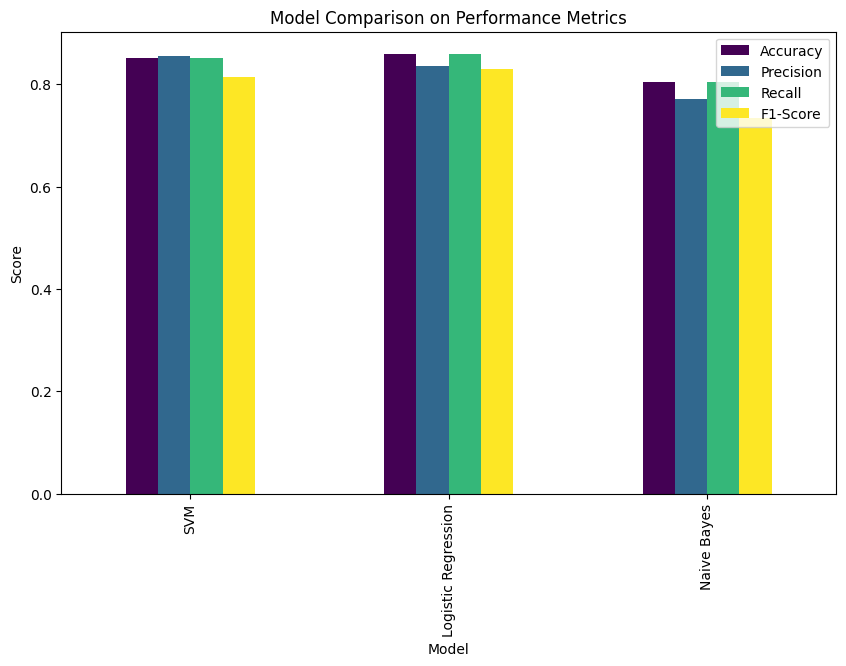

In [ ]:
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Model Comparison on Performance Metrics")
plt.ylabel("Score")
plt.show()

## By visualizing and looking after performance table Logistic regression model performs slightly better than SVM while Naive bayes lacks behind in performance

## hyperparameter tuning on the best model

In [113]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2']
}

In [114]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr_model,
                           param_grid=param_grid,
                           cv=5,    # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy to evaluate the models
                           n_jobs=-1,  # Use all available cores
                           verbose=1)

In [115]:
# Fit the model on training data
grid_search.fit(X_train, y_train)

# Get the best model with optimized parameters
best_log_reg = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8489037446158122


In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions with the best model
y_pred_test = best_log_reg.predict(X_test)

# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

print("Tuned Model Test Accuracy:", test_accuracy)
print("Tuned Model Test Precision:", test_precision)
print("Tuned Model Test Recall:", test_recall)
print("Tuned Model Test F1-Score:", test_f1)

Tuned Model Test Accuracy: 0.8626666666666667
Tuned Model Test Precision: 0.8384539811330084
Tuned Model Test Recall: 0.8626666666666667
Tuned Model Test F1-Score: 0.846294598395638


In [117]:
# Generate a classification report
print(classification_report(y_test, y_pred_test, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.76      0.62      0.68       449
     Neutral       0.31      0.14      0.19       191
    Positive       0.90      0.97      0.93      2360

    accuracy                           0.86      3000
   macro avg       0.66      0.58      0.60      3000
weighted avg       0.84      0.86      0.85      3000

